In [89]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [90]:
#defining some constants to make life easier
#experiments
#folders = [("./",1),("../reduced_env_var2/",0.3)]
folders = [("../ievTrack-standard/",1),("../reduced_env_var2/",0.3)]
#tasksV0
THOP = 'xhopperv0'
TANT = 'xantv0'
THAL = 'xhalfcheetahv0'
TWAL = 'xwalkerv0'
THUM = 'xhumanoidv0'
tasks_v0 = [THOP,TANT,THAL,TWAL,THUM]
#tasksV5
THOP5 = 'xhopper'
TANT5 = 'xant'
THAL5 = 'xhalfcheetah'
TWAL5 = 'xwalker'
THUM5 = 'xhumanoid'
tasks_v5 = [THOP5,TANT5,THAL5,TWAL5,THUM5]

In [92]:
rootDir = "."
initSeed = 1
numSeed = 10

vStat = []
iev = {}
cv = {}

iev_cv_df = pd.DataFrame()
iev_cv_df_all = pd.DataFrame()

experiments = tasks_v0 + tasks_v5

for folder in folders:
    for experiment in experiments:
        expDir = f"{folder[0]}{rootDir}/{experiment}"
        for i in range(initSeed,numSeed+1):
            try:
                f = open(f"{expDir}/S{i}.fit", "r")            
            except:
                print(f"{expDir}/S{i}.fit didn't exist")
            else:
                line = f.read()            
                m = re.search("bestgfit ([0-9]*.[0-9]{2})", line)
                if m:
                    best_g_fit = float(m.group(1))
                else:
                    print(f"Couldn't extract the best_g_fit from {expDir}/S{i}.fit")

                vStat.append((experiment, i, best_g_fit,folder[1]))

                try:
                    ievValues = np.load(f"{expDir}/S{i}.iev.npy", "r");
                    cvValues = np.load(f"{expDir}/S{i}.cv.npy", "r");
                    cvValues = np.concatenate((np.zeros(len(ievValues)-len(cvValues)),cvValues))            
                    iev_cv_df = pd.concat([iev_cv_df,pd.DataFrame({'experiment':experiment,'seed':i,'iev':ievValues,'cv':cvValues,'percentual_env_var':folder[1]})])
                    iev_cv_df_all = pd.concat([iev_cv_df_all,pd.DataFrame({'experiment':experiment+f"_S{i}",'iev':ievValues,'cv':cvValues})])
                except:
                    print("Problem loading IEV and CV data ",sys.exc_info()[0])        
            
#print(f"Average performance on {numSeed} seeds: {np.mean(vStat)} - Std deviation: {np.std(vStat)}")
sns.set(rc={"figure.figsize":(9,10)}) #width=3, #height=4
df = pd.DataFrame(vStat,columns=['experiment','seed','performance','percentual_env_var'])

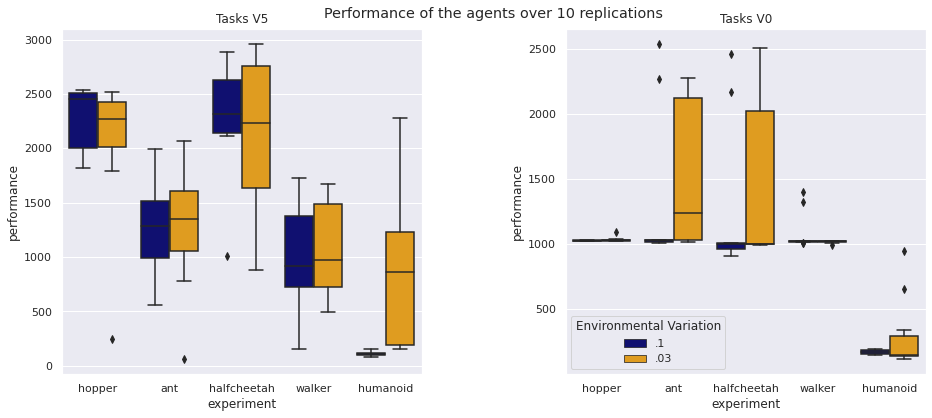

In [119]:
#crashesMod.roundTotal=crashesMod.roundTotal.astype('category')
#crashesMod.VsAverage=crashesMod.VsAverage.astype('category')
my_pal = {1.0: "navy",0.3: "orange"}


fig, axes = plt.subplots(1,2)
fig.suptitle("Performance of the agents over 10 replications",y=0.95)
fig.set_figheight(6)
fig.set_figwidth(15)

sns.set(font_scale=1.0)

df.percentual_env_var = df.percentual_env_var.astype('category')

axes[0].set_title("Tasks V5")
ax = sns.boxplot(x=df.query("experiment.isin(@tasks_v5)",engine="python").experiment,y=df.performance,hue_order=[1.0,0.3], palette=my_pal, hue=df.percentual_env_var,ax=axes[0])
ax.set_xticklabels(["hopper","ant","halfcheetah","walker","humanoid"])

l = ax.get_legend()
l.remove()
#aux = plt.xticks(rotation=75)

# title
#leg = ax.get_legend()
#new_title = 'Environmental Variation'
#leg.set_title(new_title)
## replace labels
#new_labels=['.03','.1']
#for t, l in zip(leg.texts, new_labels):
#    t.set_text(l)



axes[1].set_title("Tasks V0")
ax = sns.boxplot(x=df.query("experiment.isin(@tasks_v0)",engine="python").experiment, y=df.performance, hue=df.percentual_env_var, hue_order=[1.0,0.3],palette=my_pal,ax=axes[1])
ax.set_xticklabels(["hopper","ant","halfcheetah","walker","humanoid"])
#aux = plt.xticks(rotation=75)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.3)

plt.legend(loc='lower left')
# title
leg = ax.get_legend()
new_title = 'Environmental Variation'
leg.set_title(new_title)
# replace labels
new_labels=['.1','.03']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

In [29]:
df.query("experiment=='xhalfcheetah'")

,experiment,seed,performance,percentual_env_var
70,xhalfcheetah,1,1963.68,1.0
71,xhalfcheetah,2,2014.04,1.0
72,xhalfcheetah,3,2882.73,1.0
73,xhalfcheetah,4,1195.44,1.0
74,xhalfcheetah,5,18.09,1.0
75,xhalfcheetah,6,2937.54,1.0
76,xhalfcheetah,7,2851.22,1.0
77,xhalfcheetah,8,1769.31,1.0
78,xhalfcheetah,9,19.59,1.0
79,xhalfcheetah,10,2612.02,1.0


iev_cv_df

<AxesSubplot:ylabel='iev'>

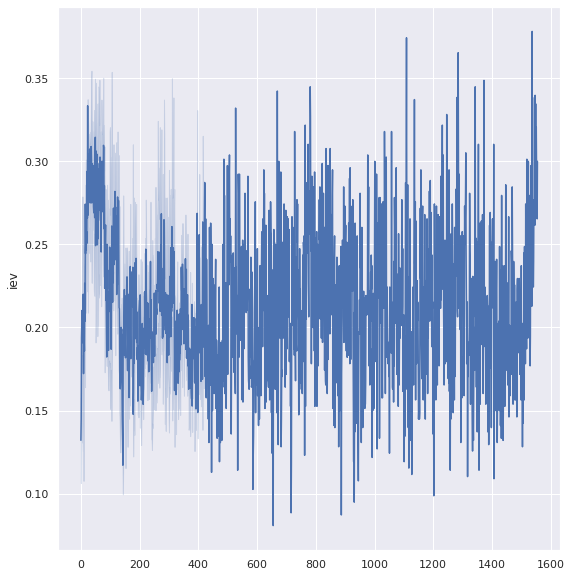

In [22]:
sns.lineplot(data=iev_cv_df.query("experiment=='xhopper' and seed==1")['iev'])

<AxesSubplot:ylabel='iev'>

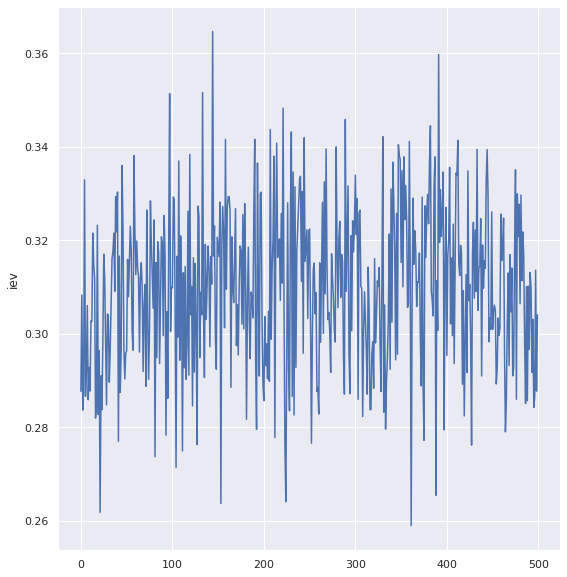

In [23]:
sns.lineplot(y=iev_cv_df.query("experiment=='xhumanoid' and seed==3").iloc[:500,2],x=range(500))

### Summarizing IEV data

In [21]:
iev_cv_df_mean = pd.DataFrame()

for expName in experiments:
    regCount = 0
    ievSeed = []
    cvSeed = []
    try:
        for folder in folders:
            for i in range(1,11):
                tmp_df = iev_cv_df.query(f"experiment=='{expName}' and seed=={i} and percentual_env_var =={folder[1]}")
                ievSeed.append(tmp_df['iev'])            
                cvSeed.append(tmp_df['cv'])
                regCount += tmp_df['cv'].shape[0]

            if regCount != 0:            
                iev_cv_df_mean = pd.concat([iev_cv_df_mean,pd.DataFrame({'experiment':expName,
                                                                         'iev':map(np.mean,zip(*ievSeed)),
                                                                         'cv':map(np.mean,zip(*cvSeed)),
                                                                         'percentual_env_var':folder[1]
                                                                        })])
    except:
        print(f"A problem occurred on summarizing IEV and CV data for {expName}")

### Extracting features and plotting summarized IEV data

In [ ]:
!pip install tsfel
import tsfel

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()

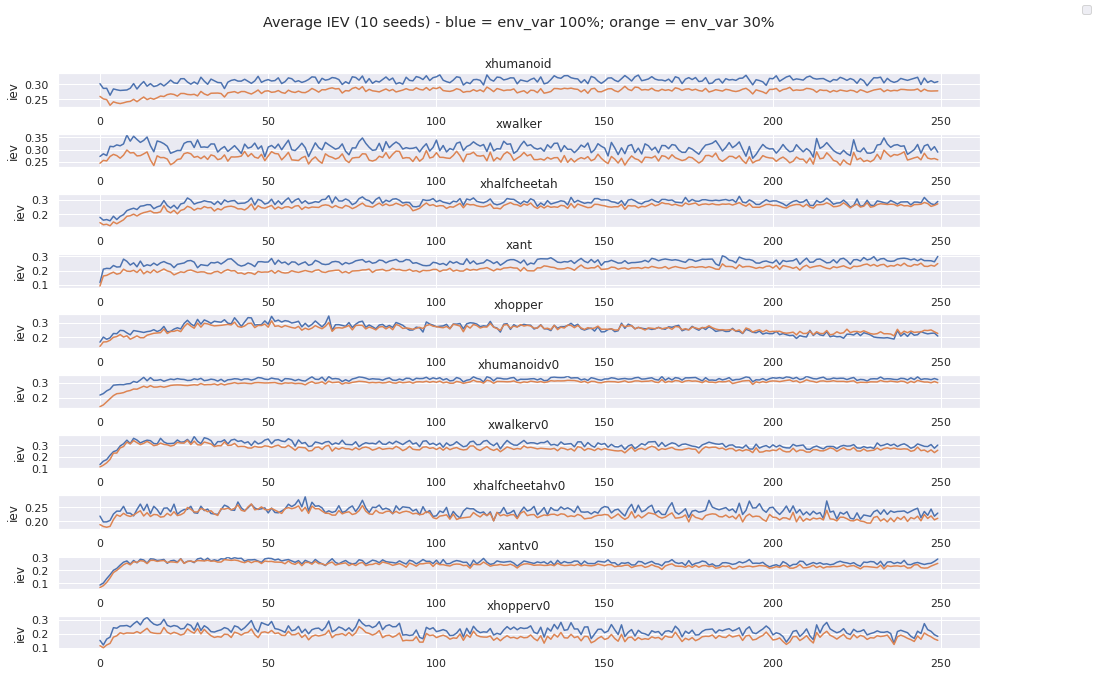

In [22]:
features = pd.DataFrame()

look_at_first_n_gen = 250

listExperiments = iev_cv_df_mean['experiment'].unique()[::-1]

fig, axes = plt.subplots(len(listExperiments), 1,figsize=(16,10))
fig.suptitle('Average IEV (10 seeds) - blue = env_var 100%; orange = env_var 30%')

means = []

inst_plot = []
for i,exp in enumerate(listExperiments):
    tmp_df = pd.DataFrame()            
    axes[i].set_title(exp)
    
    exp_df_data = iev_cv_df_mean.query(f"experiment=='{exp}' and percentual_env_var==1.0").iloc[:look_at_first_n_gen,:];
    inst_plot.append(sns.lineplot(ax=axes[i],data=exp_df_data, y="iev",x=range(len(exp_df_data.iev))))
    
    exp_df_data = iev_cv_df_mean.query(f"experiment=='{exp}' and percentual_env_var==0.3").iloc[:look_at_first_n_gen,:];
    inst_plot.append(sns.lineplot(ax=axes[i],data=exp_df_data, y="iev",x=range(len(exp_df_data.iev))))
    #means.append(data.mean())
    #tmp_df = tsfel.time_series_features_extractor(cfg, data)
    #tmp_df['experiment'] = exp
    #features = pd.concat([features,tmp_df])    

fig.legend(inst_plot,["0.3","1.0"],loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
#print(means)

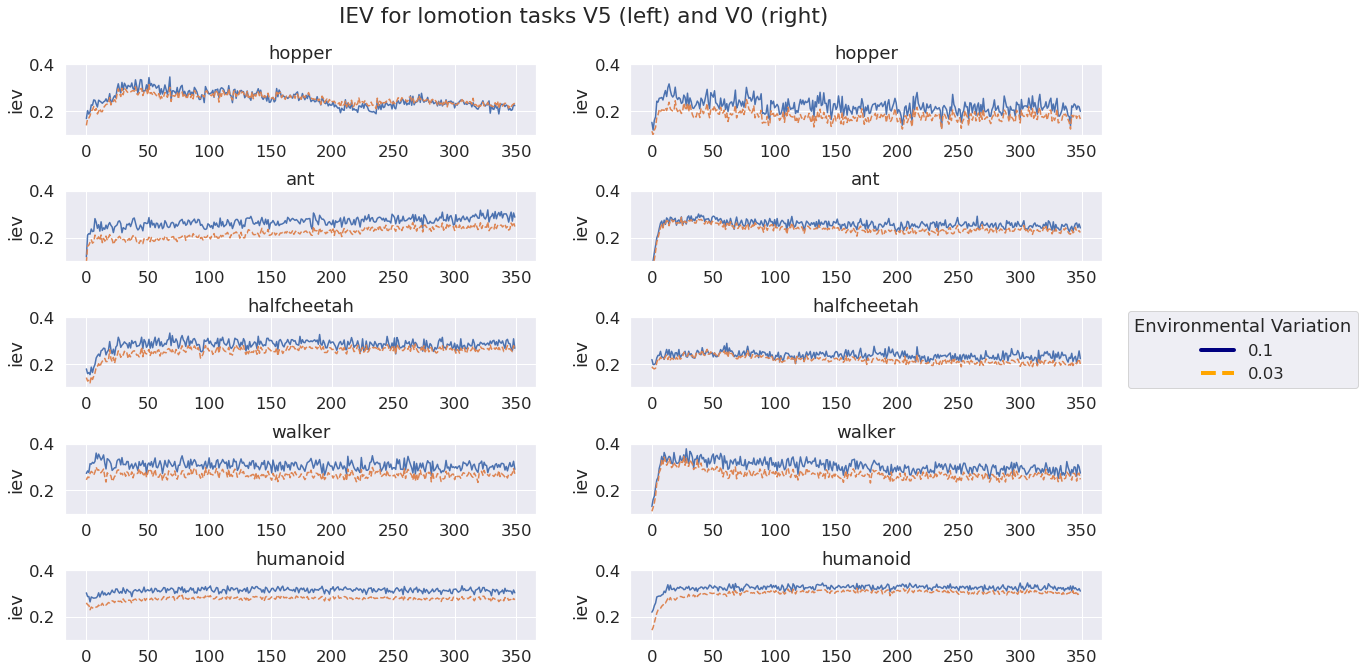

In [71]:
features = pd.DataFrame()

look_at_first_n_gen = 350

listExperiments = iev_cv_df_mean['experiment'].unique()[::-1]

means = []

bar_df = pd.DataFrame(columns=['Experiment','Average IEV','Environmental variation','Task version'])

inst_plot = []
versions = ["V5","V0"]

fig, axes = plt.subplots(5, 2,figsize=(18,10))
fig.suptitle(f"IEV for lomotion tasks V5 (left) and V0 (right)")
for i,tasks in enumerate([tasks_v5,tasks_v0]):    
    for j,exp in enumerate(tasks):
        tmp_df = pd.DataFrame()            
        axes[j,i].set_title(exp.replace("x","").replace("v0",""))

        exp_df_data = iev_cv_df_mean.query(f"experiment=='{exp}' and percentual_env_var==1.0").iloc[:look_at_first_n_gen,:];
        inst_plot.append(sns.lineplot(ax=axes[j,i],data=exp_df_data, y="iev",x=range(len(exp_df_data.iev))))
        inst_plot[-1].set_ylim(0.1,0.4)
        
        bar_df.loc[len(bar_df)+1] = [exp.replace("x","").replace("v0",""),exp_df_data['iev'].mean(),".1",versions[i]]

        exp_df_data = iev_cv_df_mean.query(f"experiment=='{exp}' and percentual_env_var==0.3").iloc[:look_at_first_n_gen,:];
        inst_plot.append(sns.lineplot(ax=axes[j,i],data=exp_df_data, linestyle="--", y="iev",x=range(len(exp_df_data.iev))))        
        
        bar_df.loc[len(bar_df)+1] = [exp.replace("x","").replace("v0",""),exp_df_data['iev'].mean(),".03",versions[i]]
        #tmp_df = tsfel.time_series_features_extractor(cfg, data)
        #tmp_df['experiment'] = exp
        #features = pd.concat([features,tmp_df])    

    #plt.legend(bbox_to_anchor=(1.02, 1),borderaxespad=0)
    #fig.legend(inst_plot,["0.3","1.0"],loc="upper right")

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.2, 
                        hspace=0.8)

from matplotlib.lines import Line2D 

legend_elements = [Line2D([0], [0], color='navy', lw=4, label='0.1'),
Line2D([0], [0], color='Orange', linestyle = '--', lw=4, label='0.03')]

# Create the figure
leg = fig.legend(handles=legend_elements, loc=3,bbox_to_anchor=(0.92, 0.45), borderaxespad=0)
leg.set_title("Environmental Variation")


sns.set(font_scale=1.5)


Text(0.5, 1.05, 'Average IEV value for 10 replications')

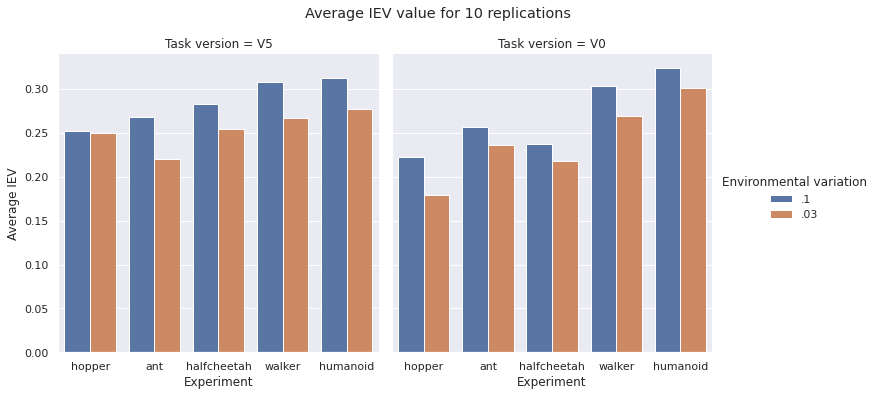

In [36]:
sns.set(font_scale=3)
sns.set(rc={"figure.figsize":(15, 10)}) #width=3, #height=4
cat = sns.catplot(data=bar_df,x="Experiment",y="Average IEV",col="Task version",hue="Environmental variation",kind="bar")
cat.fig.suptitle("Average IEV value for 10 replications",y=1.05)

In [20]:
features

,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,...,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,0_Zero crossing rate,experiment
0,1.890403e-06,0.000601,0.000037,0.000069,1.870879e-05,4.343097e-05,2.066123e-05,1.279894e-05,7.839643e-06,6.348480e-05,...,69.0,7.0,0.185960,70.0,239.051660,0.000163,4.080055,6.095710,0.0,xhopperv0
0,6.616943e-07,0.000079,0.000149,0.000011,1.114752e-05,1.701740e-06,1.413289e-05,2.972440e-06,4.568533e-07,4.149266e-06,...,76.0,8.0,0.200583,77.0,239.010586,-0.000152,1.523121,4.684233,0.0,xantv0
0,8.298173e-07,0.000060,0.000036,0.000010,1.911323e-06,5.686807e-06,1.152706e-06,1.035119e-07,9.699481e-07,7.986806e-08,...,80.0,10.0,0.050271,80.0,239.009051,-0.000074,1.661970,4.778164,0.0,xhalfcheetahv0
0,3.153850e-06,0.000057,0.000001,0.000017,3.605025e-05,2.542727e-07,3.234733e-06,2.643133e-07,2.508767e-07,5.871679e-06,...,81.0,11.0,0.216673,80.0,239.025815,0.000038,2.778256,9.522444,0.0,xwalkerv0
0,1.519584e-05,0.000014,0.000006,0.000008,1.325007e-06,2.405096e-06,7.260539e-06,4.034076e-06,3.467165e-06,7.449527e-06,...,74.0,11.0,0.162362,74.0,239.028946,0.000093,2.963136,10.359856,0.0,xhumanoidv0
0,4.417422e-05,0.000918,0.000170,0.000024,4.363503e-06,1.452034e-05,1.533524e-05,1.345031e-05,4.285281e-06,4.488964e-05,...,66.0,7.0,0.166598,66.0,239.014433,-0.000227,2.048487,7.184075,0.0,xhopper
0,1.223957e-05,0.000051,0.000016,0.000016,3.984709e-07,3.556586e-06,7.227486e-07,1.319740e-07,2.018325e-06,3.637044e-07,...,78.0,10.0,0.180317,79.0,239.013845,0.000122,1.782859,6.814950,0.0,xant
0,4.577478e-05,0.000396,0.000038,0.000004,1.307445e-05,1.619606e-06,4.658289e-09,4.657737e-06,7.385284e-07,4.529064e-08,...,75.0,10.0,0.148824,74.0,239.012098,-0.000090,1.906216,7.259785,0.0,xhalfcheetah
0,1.350547e-06,0.000260,0.000007,0.000003,2.486006e-06,1.147374e-05,3.196754e-06,1.853416e-06,3.747414e-08,7.678970e-06,...,79.0,7.0,0.064593,79.0,239.016089,-0.000128,2.228799,8.808935,0.0,xwalker
0,3.057882e-06,0.000014,0.000008,0.000002,5.886669e-06,8.367947e-07,1.857442e-06,2.941674e-06,8.879264e-07,5.169269e-06,...,79.0,10.0,0.069176,79.0,239.026291,0.000059,2.829749,9.835291,0.0,xhumanoid


### Preparing the data (normalizing and removing null columns)

In [21]:
#standard scaler
num_feat = features.columns[:-1]
features[num_feat] = (features[num_feat] - features[num_feat].mean())/features[num_feat].std()
#drop null columns
features = features.dropna(axis=1)
num_feat = features.columns[:-1]

In [33]:
features

,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,...,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,experiment
0,-0.619670,1.161827,-0.157480,2.657997,0.829373,2.653755,1.896039,1.726523,2.332932,2.267320,...,1.024444,-1.367315,-1.262528,0.682857,-1.219440,2.381610,1.384832,2.163640,-0.706104,xhopperv0
0,-0.689252,-0.541579,1.670899,-0.278175,0.145768,-0.520890,1.005878,-0.274595,-0.665366,-0.446859,...,-1.035764,0.061223,-0.661324,0.923912,0.252298,-0.796669,-1.005140,-1.091047,-1.398879,xantv0
0,-0.679731,-0.605623,-0.181962,-0.318065,-0.689265,-0.217717,-0.764014,-0.858838,-0.456988,-0.633006,...,-1.058404,0.877531,0.541083,-1.553902,0.883043,-0.915423,-0.415531,-0.914308,-1.352776,xhalfcheetahv0
0,-0.548121,-0.613800,-0.743301,0.045596,2.397191,-0.631009,-0.480122,-0.826091,-0.749017,-0.368071,...,1.601756,1.081608,1.142287,1.189155,0.883043,0.381802,0.437843,0.506598,0.975790,xwalkerv0
0,0.133815,-0.752937,-0.669926,-0.451280,-0.742273,-0.467381,0.068810,-0.058398,0.557181,-0.295896,...,-0.005660,-0.346931,1.142287,0.293855,-0.378447,0.624035,0.859438,0.741928,1.386805,xhumanoidv0
0,1.774857,2.197698,2.012063,0.399527,-0.467566,0.454314,1.169823,1.859172,0.889435,1.416724,...,-0.718809,-1.979546,-1.262528,0.363687,-2.060433,-0.498956,-1.576469,-0.422315,-0.171917,xhopper
0,-0.033598,-0.633054,-0.505831,-0.018777,-0.826040,-0.379778,-0.822640,-0.853042,-0.031221,-0.620022,...,-1.081044,0.469377,0.541083,0.589831,0.672794,-0.544493,1.075304,-0.760429,-0.353090,xant
0,1.865497,0.493435,-0.140039,-0.621891,0.319979,-0.527138,-0.920554,0.068607,-0.550972,-0.634587,...,-0.311295,-0.142854,0.541083,0.070693,-0.378447,-0.679631,-0.535402,-0.603410,-0.134758,xhalfcheetah
0,-0.650242,0.048947,-0.650672,-0.668516,-0.637308,0.222537,-0.485301,-0.502479,-0.835684,-0.285401,...,0.515052,0.673454,-1.262528,-1.317817,0.672794,-0.370848,-0.824987,-0.192799,0.625589,xwalker
0,-0.553556,-0.754915,-0.633751,-0.746416,-0.329859,-0.586693,-0.667920,-0.280860,-0.490299,-0.400202,...,1.069724,0.673454,0.541083,-1.242270,0.672794,0.418574,0.600113,0.572142,1.129340,xhumanoid


### Clustering for automatically identifying good from bad experiment setups

In [23]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 2, random_state=1)
kmean.fit(features[num_feat])
centers = kmean.cluster_centers_
labels = kmean.labels_

In [24]:
labels

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

### Analyzing not summarized data

In [25]:
features_all = pd.DataFrame()

look_at_first_n_gen = 240

#feature extraction and preparation
for i,exp in enumerate(iev_cv_df_all['experiment'].unique()):
    data = iev_cv_df_all.query(f"experiment=='{exp}'").iloc[:look_at_first_n_gen,1]        
    tmp_df = tsfel.time_series_features_extractor(cfg, data)
    tmp_df['experiment'] = exp
    features_all = pd.concat([features_all,tmp_df])

features_all.reset_index(inplace=True,drop=True)
norm_features_all = features_all.copy()
#standard scaler
num_feat = features_all.columns[:-1]
norm_features_all[num_feat] = (features_all[num_feat] - features_all[num_feat].mean())/features_all[num_feat].std()
#drop null columns
norm_features_all = norm_features_all.dropna(axis=1)
num_feat = norm_features_all.columns[:-1]

*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


In [26]:
##feature selection based on var threshold
feat_var01 = features_all[features_all.columns[:-1]].columns[features_all.var()>0.1]
print(f"{len(feat_var01)} features selected with threshold var = {0.1}")
feat_var001 = features_all[features_all.columns[:-1]].columns[features_all.var()>0.01]
print(f"{len(feat_var001)} features selected with threshold var = {0.01}")
feat_var0001 = features_all[features_all.columns[:-1]].columns[features_all.var()>0.001]
print(f"{len(feat_var0001)} features selected with threshold var = {0.001}")
feat_var00001 = features_all[features_all.columns[:-1]].columns[features_all.var()>0.001]
print(f"{len(feat_var00001)} features selected with threshold var = {0.0001}")

32 features selected with threshold var = 0.1
38 features selected with threshold var = 0.01
60 features selected with threshold var = 0.001
60 features selected with threshold var = 0.0001


In [27]:
from sklearn.cluster import KMeans

use_feat = num_feat #all non-null numerical features

#use_feat = features_all.columns[-44:-1] #statistical features
#use_feat = features_all.columns[-81:-44] # wavelet features
#use_feat = features_all.columns[-125:-81] #spectral features
#use_feat = features_all.columns[:-122] #fft features

#use_feat = feat_var01

kmean = KMeans(n_clusters = 2, random_state=1)
kmean.fit(norm_features_all[use_feat])
centers = kmean.cluster_centers_
labels = kmean.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Average = 0.334; Std = 0.010


<AxesSubplot:ylabel='Count'>

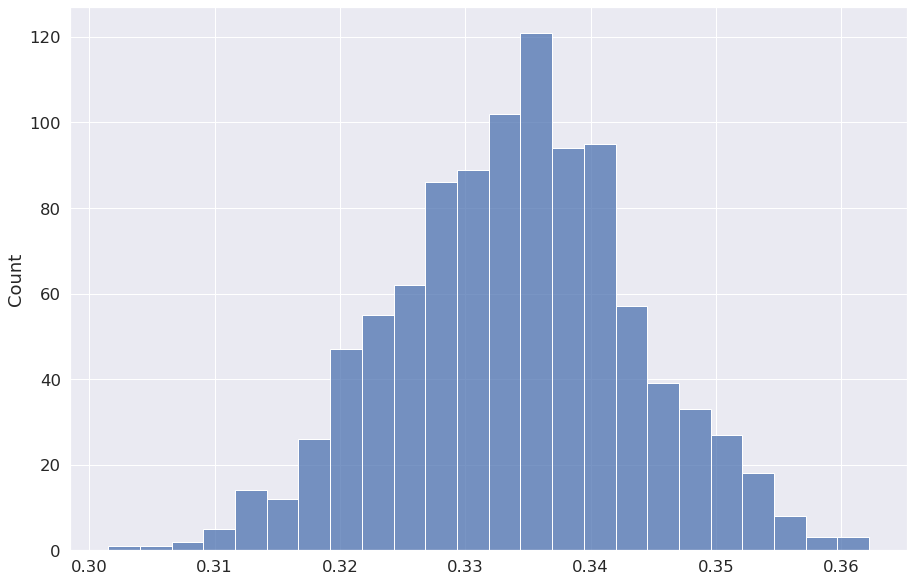

In [80]:
s=500
k = 1000

iev = []
for i in range(k):
    r1 = np.random.permutation(s)+1
    r2 = np.random.permutation(s)+1
    iev.append(sum(np.abs(r1-r2)/(s-1))/s)
    
print(f"Average = {np.mean(iev):.3f}; Std = {np.std(iev):.3f}")
    
sns.histplot(iev)